<a href="https://colab.research.google.com/github/JSRV18/Dinosaurio-repository/blob/main/Arqu%C3%ADmedes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install pint
!pip install pint uncertainties
import uncertainties
from uncertainties import ufloat
import pint as pint
ureg=pint.UnitRegistry(auto_reduce_dimensions=True)
Measurement=ureg.Measurement
Quantity=ureg.Quantity

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.0/302.0 kB 5.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.1/60.1 kB 2.7 MB/s eta 0:00:00


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import uncertainties.unumpy as unp
from scipy.optimize import curve_fit

# **1) Volúmenes Medidos**

In [3]:
b_Laton = ufloat(1.980, 0.005) * ureg.cm
p_Laton = ufloat(1.980, 0.005) * ureg.cm
h_Laton = ufloat(1.895, 0.005) * ureg.cm

Volumen_Laton = b_Laton * p_Laton * h_Laton

b_Fe = ufloat(1.975, 0.005) * ureg.cm
p_Fe = ufloat(1.975, 0.005) * ureg.cm
h_Fe = ufloat(1.940, 0.005) * ureg.cm

Volumen_Fe = b_Fe * p_Fe * h_Fe

f'{Volumen_Laton:.3f}', f'{Volumen_Fe:.3f}'

('7.429+/-0.033 centimeter ** 3', '7.567+/-0.033 centimeter ** 3')

# **2) Volúmenes Sumergidos**

In [4]:
RhoA = Quantity(1, 'g/cm^3')
g = Quantity(9.771, 'm/s^2')


T0_Laton = ufloat(0.586, 0.003) * ureg.N
T_Laton = ufloat(0.515, 0.003) * ureg.N

Vs_Laton = (T0_Laton - T_Laton) / (RhoA*g)
Vs_Laton = Vs_Laton.to('cm^3')

T0_Fe = ufloat(0.581, 0.003) * ureg.N
T_Fe = ufloat(0.506, 0.003) * ureg.N

Vs_Fe = (T0_Fe - T_Fe) / (RhoA*g)
Vs_Fe = Vs_Fe.to('cm^3')

f'{Vs_Fe:.3f}', f'{Vs_Laton:.3f}'

('7.676+/-0.434 centimeter ** 3', '7.266+/-0.434 centimeter ** 3')

# **3) Fuerzas vs volumen Aluminio**

In [74]:
def ajuste (m, x, b):
  return m*x + b

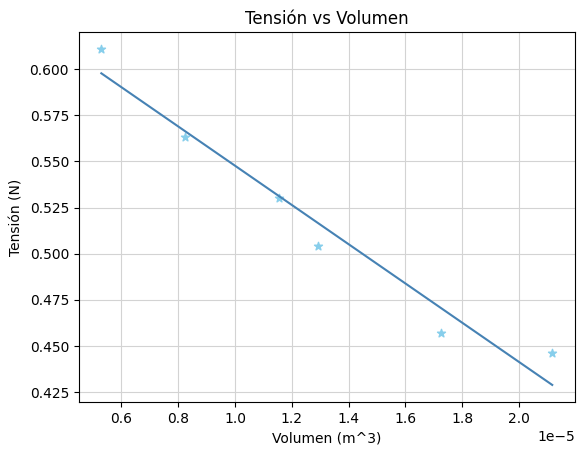

In [38]:
# Prueba, xd

b_Aluminio = ufloat(1.980, 0.005) * ureg.cm

A_Aluminio = b_Aluminio * b_Aluminio

h_Aluminio = unp.uarray([1.350, 2.100, 2.950, 3.300, 4.400, 5.400], 0.005) * ureg.cm

T_xd = unp.uarray([0.611, 0.563, 0.530, 0.504, 0.457, 0.446], 0.003) * ureg.N
V_xd = A_Aluminio * h_Aluminio

V_xd = V_xd.to('m^3')
V_xd

l_T_xd = [i.n for i in T_xd]
l_V_xd = [i.n for i in V_xd]

V_array = np.array(l_V_xd)
T_array = np.array(l_T_xd)

poptxd, pocvxd= curve_fit(ajuste, V_array, T_array)
m2= poptxd[0]
b2= poptxd[1]

plt.scatter(V_array, T_array, marker= "*", c= "skyblue")
plt.plot(V_array, ajuste(m2, V_array, b2), c= "steelblue")
plt.title('Tensión vs Volumen')
plt.xlabel('Volumen (m^3)')
plt.ylabel('Tensión (N)')
plt.grid(c="lightgrey")
plt.show()

In [60]:
m2 = Quantity(m2, 'N/m^3')
g = Quantity(9.771, 'm/s^2')

Rhof_xd=-m2/g
Rhof_xd = Rhof_xd.to('g/cm^3')
err_m2 = np.sqrt(pocvxd[0, 0])
err_Rhof_xd = Quantity(err_m2, 'N/m^3')
err_xd = err_Rhof_xd/g
err_xd = err_xd.to('g/cm^3')

Rhof_xd_defT = ufloat(Rhof_xd.m, err_xd.m) * ureg.g/ureg.cm**3
Rhof_xd_defT


<Quantity(1.08919+/-0.11292, 'gram / centimeter ** 3')>

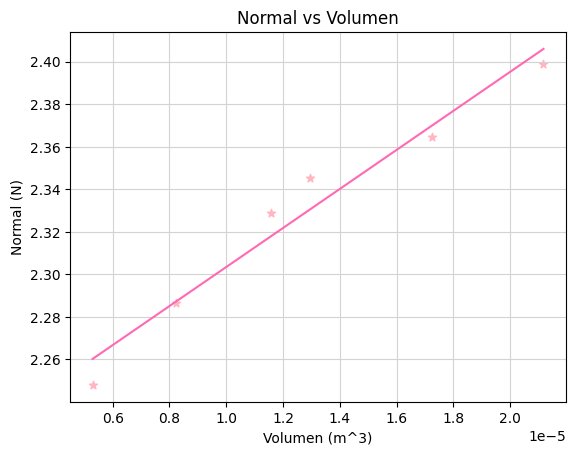

In [68]:
g_bal = unp.uarray([230.07, 234.00, 238.33, 240.02, 242.00, 245.51], 0.01) * ureg.g
g_bal = g_bal.to('kg')

N_xd = g_bal*g
N_xd = N_xd.to('N')

array_N_xd = np.array([i.n for i in N_xd])

poptxd1, pocvxd1= curve_fit(ajuste, V_array, array_N_xd)
m3= poptxd1[0]
b3= poptxd1[1]

plt.scatter(V_array, array_N_xd, marker= "*", c= "lightpink")
plt.plot(V_array, ajuste(m3, V_array, b3), c= "hotpink")
plt.title('Normal vs Volumen')
plt.xlabel('Volumen (m^3)')
plt.ylabel('Normal (N)')
plt.grid(c="lightgrey")
plt.show()

In [73]:
m3 = Quantity(m3, 'N/m^3')

Rho_xd2 = m3/g
Rho_xd2 = Rho_xd2.to('g/cm^3')
err_m3 = np.sqrt(pocvxd1[0, 0])
err_Rhof_xd2 = Quantity(err_m3, 'N/m^3')
err_xd2 = err_Rhof_xd2/g
err_xd2 = err_xd2.to('g/cm^3')

Rhof_xd_defN = ufloat(Rho_xd2.m, err_xd2.m) * ureg.g/ureg.cm**3
Rhof_xd_defN

<Quantity(0.939747+/-0.093970, 'gram / centimeter ** 3')>

# 6) Cálculo de M

In [88]:
b3 = Quantity(b3, 'N')

M = b3/g
M = M.to('g')
err_M = np.sqrt(pocvxd1[1, 1])
err_M = Quantity(err_M, 'N')
err_M = err_M/g
err_M = err_M.to('g')

M_def = ufloat(M.m, err_M.m) * ureg.g
M_def

<Quantity(226.348+/-1.297, 'gram')>